In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/ALIMENTACION/Alimentacion.csv')


In [123]:
df.head(5)

,edad,sexo,e_profesional,c_academico,trabaja,e_civil,v_frutas,r_grasas,l_etiquetas,b_alcoholicas,agua,comer_deshoras,c_dulces,peso,Diagnostico
0,Más de 21 años,Femenino,EPIS,IX,No,Soltero,3 porciones de verduras y 2 frutas,Demasiado,Siempre,Menos de 12 veces al año,Menos de 6 vasos,Presentación de proyectos Finales,Menos de 3 dulces,Peso normal,No Saludable
1,Más de 21 años,Masculino,EPIS,IX,No,Soltero,3 porciones de verduras y 2 frutas,Poco,A veces,Menos de 12 veces al año,Menos de 6 vasos,Presentación de proyectos Finales,Más de 7 dulces,Sobrepeso,No Saludable
2,Entre 18 a 21 años,Masculino,EPIS,IX,No,Soltero,3 porciones de verduras y 2 frutas,Demasiado,Frecuentemente,Nunca,Menos de 6 vasos,Tengo que trabajar y estudiar,Más de 7 dulces,Obesidad,No Saludable
3,Más de 21 años,Masculino,EPIS,IX,Sí,Soltero,5 porciones de verduras y 4 frutas,Nada,Frecuentemente,Una vez al año,Entre 6 a 8 vasos,Exámenes Parciales,0 dulces,Peso normal,Saludable
4,Más de 21 años,Masculino,EPIS,IX,Sí,Soltero,3 porciones de verduras y 2 frutas,Demasiado,Casi nunca,Cada fin de semana,Menos de 6 vasos,Tengo que trabajar y estudiar,0 dulces,Peso normal,No Saludable


In [124]:
#Eliminación de columnas no relevantes
df.drop(['edad','sexo','e_profesional','c_academico','trabaja','e_civil'], axis = 1, inplace=True)

In [125]:
#Alimentación: Reemplazando con valores ordinales
df['v_frutas'].replace(('5 porciones de verduras y 4 frutas','4 porciones de verduras y 3 frutas','3 porciones de verduras y 2 frutas'),(2,1,0), inplace = True)
df['r_grasas'].replace(('Nada','Poco', 'Mucho', 'Demasiado'),(0,1,2,3), inplace = True)
df['l_etiquetas'].replace(('Nunca','Casi nunca','A veces', 'Frecuentemente', 'Siempre'),(0,1,2,3,4), inplace = True)
df['b_alcoholicas'].replace(('Nunca', 'Una vez al año', 'Menos de 12 veces al año', 'Una vez al mes', 'Cada fin de semana'),(4,3,2,1,0), inplace = True)
df['agua'].replace(('Menos de 6 vasos', 'Entre 6 a 8 vasos', 'Más de 8 vasos'),(0,1,2), inplace = True)
df['comer_deshoras'].replace(('Presentación de proyectos Finales', 'Exámenes Parciales','Tengo que trabajar y estudiar', 'Vivo lejos a la universidad','Falta de apoyo económico'),(0,1,2,3,4), inplace = True)
df['c_dulces'].replace(('Más de 7 dulces','4 a 7 dulces','Menos de 3 dulces','0 dulces'),(0,1,2,3), inplace = True)
df['peso'].replace(('Obesidad','Sobrepeso', 'Peso normal', 'Debajo de su peso normal'),(0,1,2,3), inplace = True)


In [126]:
df.head(5)

,v_frutas,r_grasas,l_etiquetas,b_alcoholicas,agua,comer_deshoras,c_dulces,peso,Diagnostico
0,0,3,4,2,0,0,2,2,No Saludable
1,0,1,2,2,0,0,0,1,No Saludable
2,0,3,3,4,0,2,0,0,No Saludable
3,2,0,3,3,1,1,3,2,Saludable
4,0,3,1,0,0,2,3,2,No Saludable


In [127]:
#Dividiendo los datos en x e y
x = df.drop(['Diagnostico'], axis=1)
y = df['Diagnostico']

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.8, random_state=0)

In [130]:
from sklearn.tree import DecisionTreeClassifier

#llamamos al constructor del arbol de decision
tr = DecisionTreeClassifier(max_depth=5)

#entrenemos el modelo
tr.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

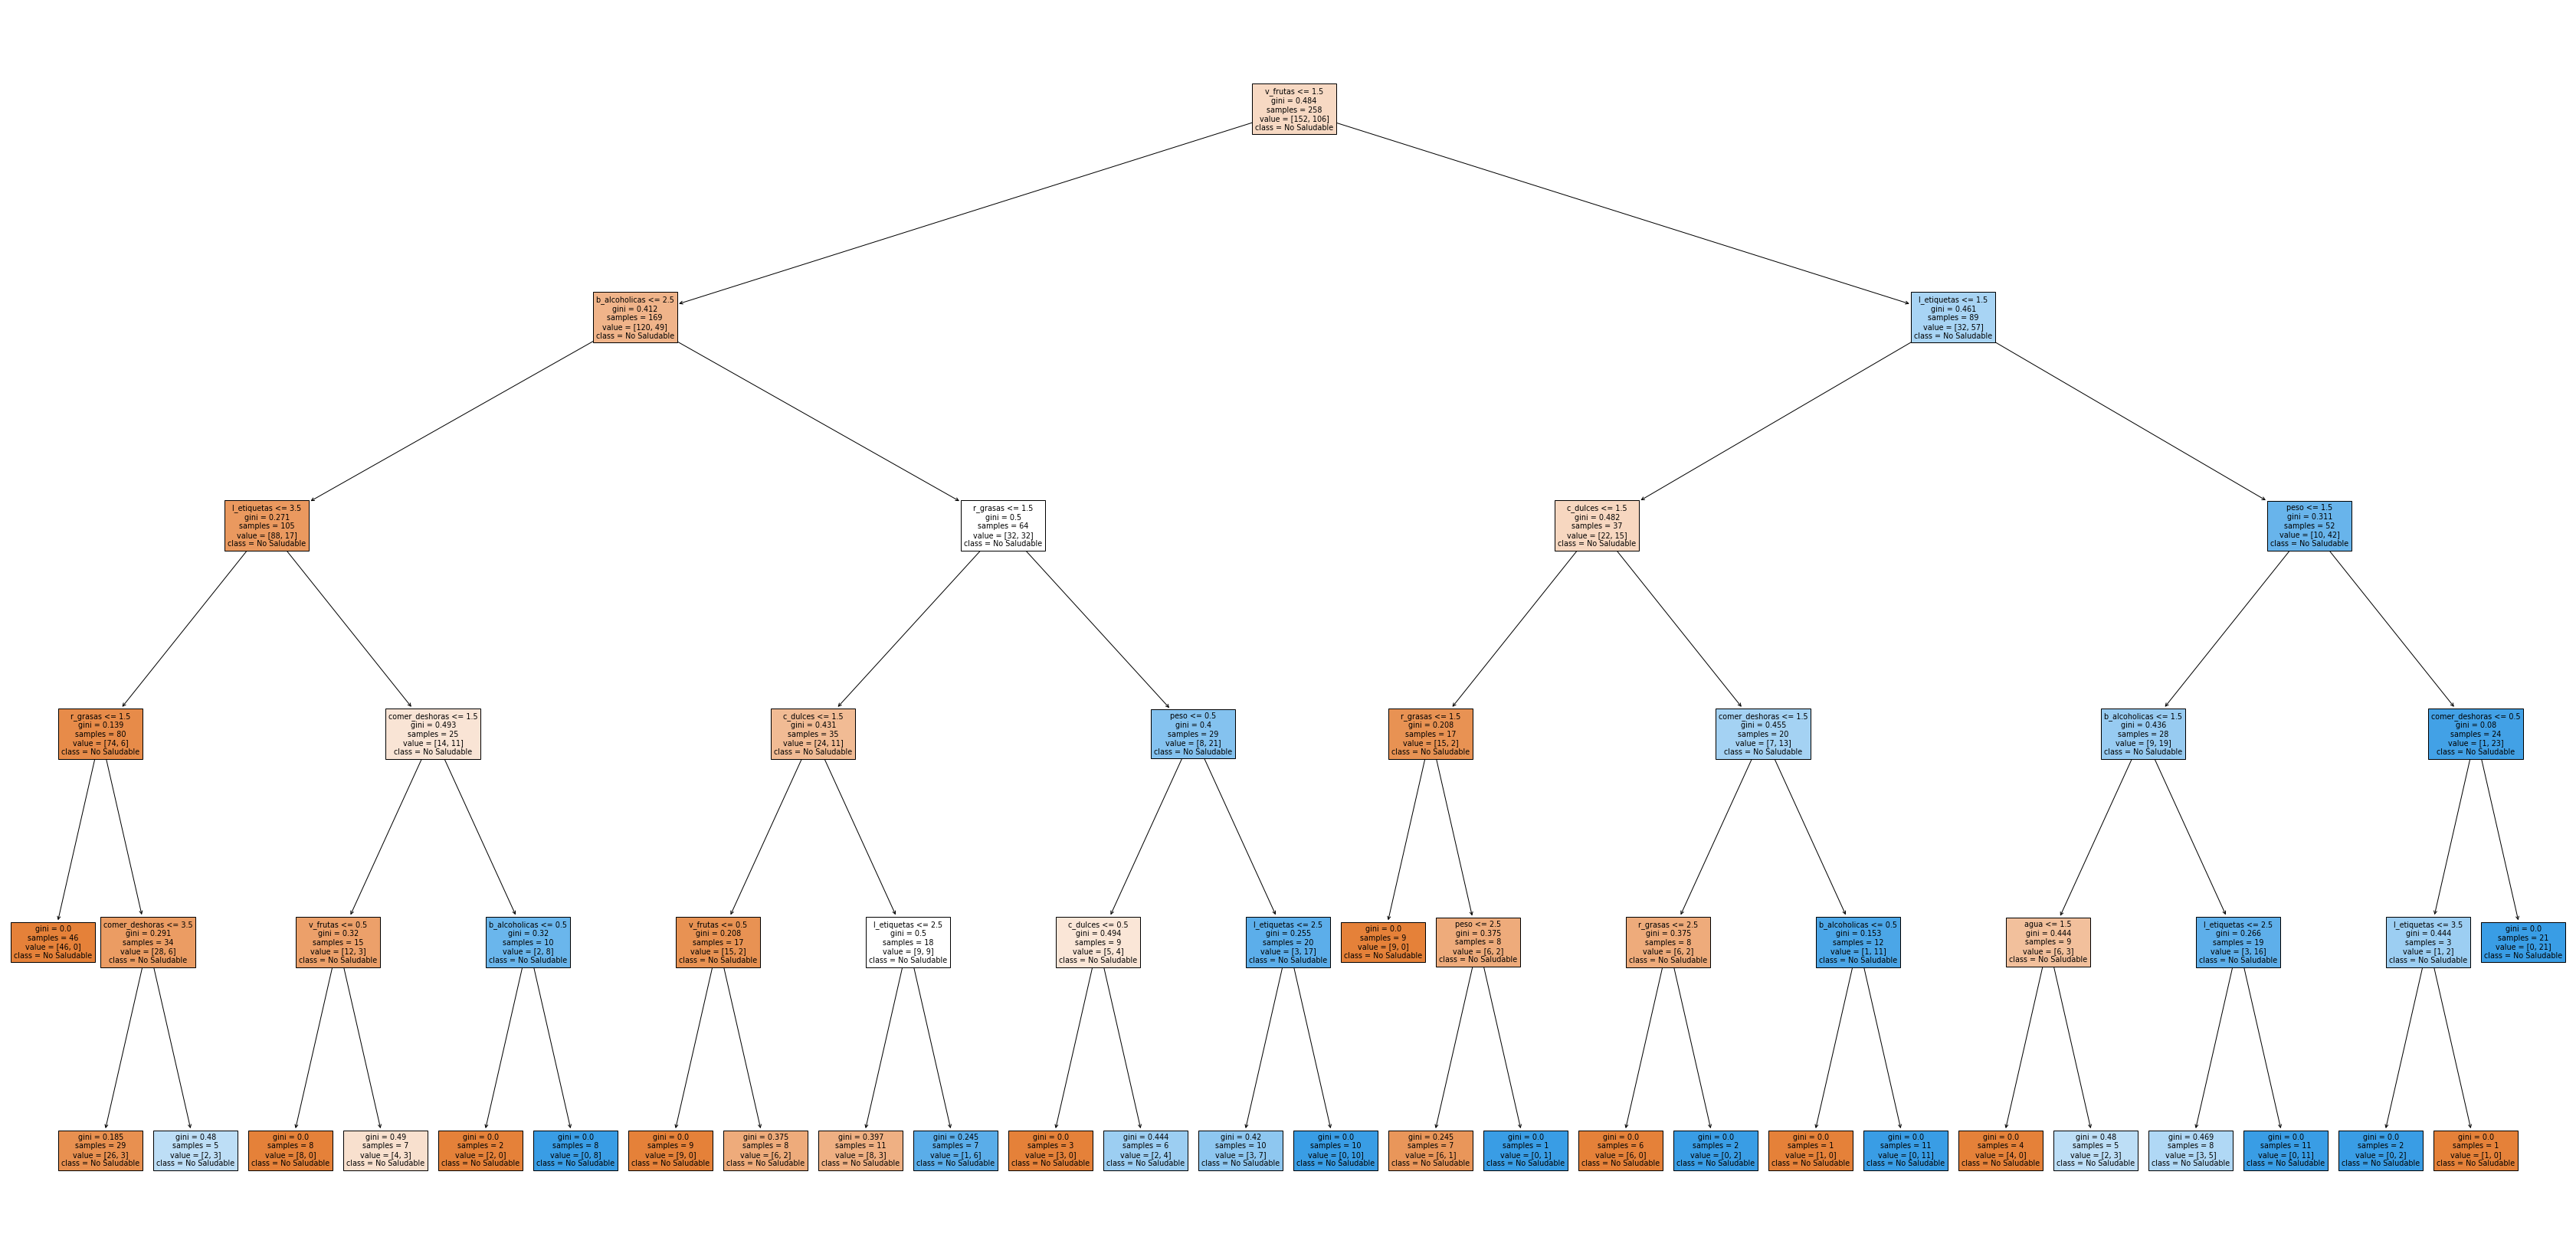

In [131]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(60,30))

tree.plot_tree(tr, feature_names=list(x.columns.values),
               class_names=list(y.values), filled=True)
plt.show()
fig.savefig('fig_arbol.png')